In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [5]:
# Load dataset
df = pd.read_csv(r"D:\DataScience\Datascience Assignment\19)amazonreviews.tsv", sep="\t")

# Data cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['review'] = df['review'].str.lower()

# Encode labels
df['label'] = df['label'].map({'pos': 1, 'neg': 0})

X = df['review']
y = df['label']
print(X)
print(y)


0       stuning even for the non-gamer: this sound tra...
1       the best soundtrack ever to anything.: i'm rea...
2       amazing!: this soundtrack is my favorite music...
3       excellent soundtrack: i truly like this soundt...
4       remember, pull your jaw off the floor after he...
                              ...                        
9995    a revelation of life in small town america in ...
9996    great biography of a very interesting journali...
9997    interesting subject; poor presentation: you'd ...
9998    don't buy: the box looked used and it is obvio...
9999    beautiful pen and fast delivery.: the pen was ...
Name: review, Length: 10000, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    0
9998    0
9999    1
Name: label, Length: 10000, dtype: int64


In [6]:
# Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
# Feature Extraction (TF-IDF)
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
# Exploratory Data Analysis (EDA)
# Sentiment distribution

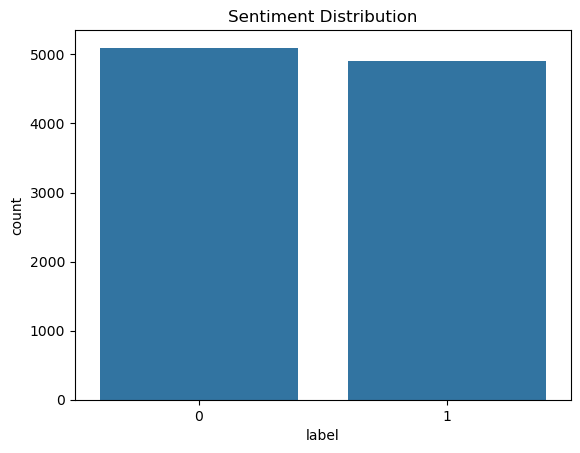

In [9]:
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [10]:
# Feature Extraction (TF-IDF)

print(X)
print(y)

0       stuning even for the non-gamer: this sound tra...
1       the best soundtrack ever to anything.: i'm rea...
2       amazing!: this soundtrack is my favorite music...
3       excellent soundtrack: i truly like this soundt...
4       remember, pull your jaw off the floor after he...
                              ...                        
9995    a revelation of life in small town america in ...
9996    great biography of a very interesting journali...
9997    interesting subject; poor presentation: you'd ...
9998    don't buy: the box looked used and it is obvio...
9999    beautiful pen and fast delivery.: the pen was ...
Name: review, Length: 10000, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    0
9998    0
9999    1
Name: label, Length: 10000, dtype: int64


In [11]:
# Existing Model: Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)

y_pred_lr = lr.predict(X_test_tfidf)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8495
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1019
           1       0.85      0.84      0.85       981

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



In [12]:
# SVM Model
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

y_pred_svm = svm.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("SVM Classification Report:")

SVM Accuracy: 0.835
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1019
           1       0.83      0.83      0.83       981

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.83      0.84      2000

SVM Classification Report:


In [13]:
# Neural Network Model
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(
    hidden_layer_sizes=(100,),
    max_iter=10,
    random_state=42
)

nn.fit(X_train_tfidf, y_train)

y_pred_nn = nn.predict(X_test_tfidf)

print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))
print("Neural Network Classification Report:")

Neural Network Accuracy: 0.8415
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1019
           1       0.84      0.84      0.84       981

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Neural Network Classification Report:


C:\Users\gopal\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


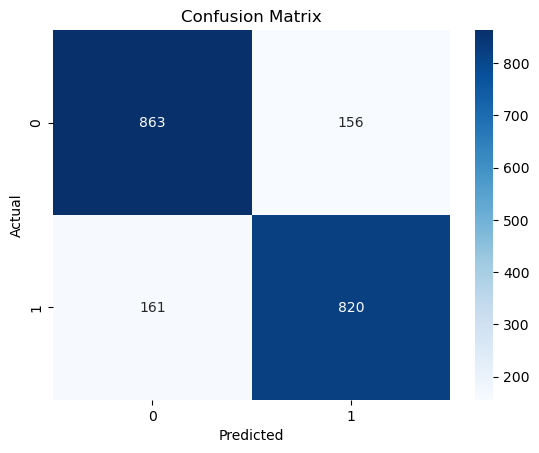

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
# Model Performance Comparison
comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Neural Network"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_nn)
    ]
})

comparison


,Model,Accuracy
0,Logistic Regression,0.8495
1,SVM,0.8350
2,Neural Network,0.8415
